### Elastix Image Registration

In [1]:
import itk
from itkwidgets import view
import numpy as np
import matplotlib.pyplot as plt

#### Register the moving image to the fixed image using Elastix registration.

In [2]:
# Load images
fixed_image = itk.imread('C:/Users/BazB1/Desktop/Work/in2research/Data/CAMUS_public/database_nifti/patient0001/patient0001_2CH_ED.nii.gz')
moving_image = itk.imread('C:/Users/BazB1/Desktop/Work/in2research/Data/CAMUS_public/database_nifti/patient0001/patient0001_2CH_ES.nii.gz')

# Obtain the registered image and the transform parameters
registered_image, params = itk.elastix_registration_method(fixed_image, moving_image)

In [3]:
registered_image

<itk.itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkImageF2 *' at 0x00000243E1CD9080> >

In [4]:
params

<itk.elxParameterObjectPython.elastixParameterObject; proxy of <Swig Object of type 'elastixParameterObject *' at 0x00000243E1CD8FF0> >

In [5]:
print(params)

ParameterObject (0000024397DFA470)
  RTTI typeinfo:   class elastix::ParameterObject
  Reference Count: 1
  Modified Time: 117901
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (CompressResultImage "false")
  (DefaultPixelValue 0)
  (Direction 1 0 0 1)
  (FinalBSplineInterpolationOrder 3)
  (FixedImageDimension 2)
  (FixedInternalImagePixelType "float")
  (HowToCombineTransforms "Compose")
  (Index 0 0)
  (InitialTransformParametersFileName "NoInitialTransform")
  (MovingImageDimension 2)
  (MovingInternalImagePixelType "float")
  (NumberOfParameters 2)
  (Origin 0 0)
  (ResampleInterpolator "FinalBSplineInterpolator")
  (Resampler "DefaultResampler")
  (ResultImageFormat "nii")
  (ResultImagePixelType "float")
  (Size 549 389)
  (Spacing 0.308 0.308)
  (Transform "TranslationTransform")
  (TransformParameters -0.00492996 0.00503954)
  (UseDirectionCosines "true")
ParameterMap 1: 
  (CenterOfRotationPoint 84.3871 59.757)
  (CompressResultImage "false")
  (Defaul

In [6]:
# Convert ITK images to numpy arrays
fixed_image_np = itk.array_from_image(fixed_image)
registered_image_np = itk.array_from_image(registered_image)
moving_image_np = itk.array_from_image(moving_image)

#### Plot the registered image alongside the fixed and moving images.

Text(0.5, 1.0, 'Registered image')

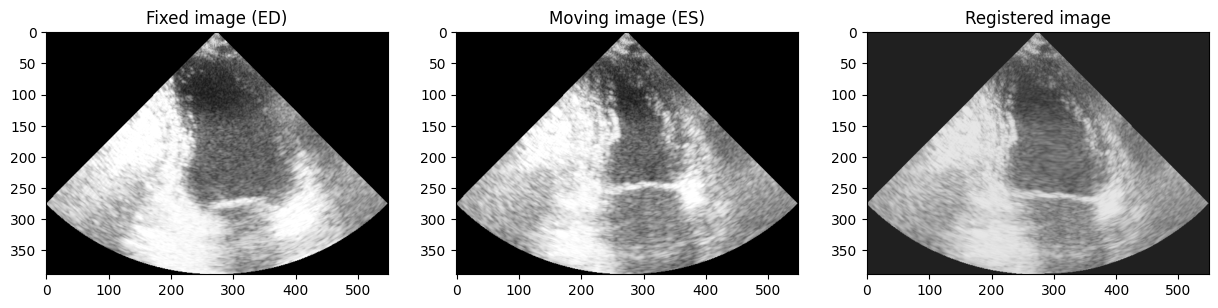

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(fixed_image_np, cmap='gray')
plt.title('Fixed image (ED)')
plt.subplot(1,3,2)
plt.imshow(moving_image_np, cmap='gray')
plt.title('Moving image (ES)')
plt.subplot(1,3,3)
plt.imshow(registered_image_np, cmap='gray')
plt.title('Registered image')

#### Interactively explore the registered image using the `itkwidgets` viewer.


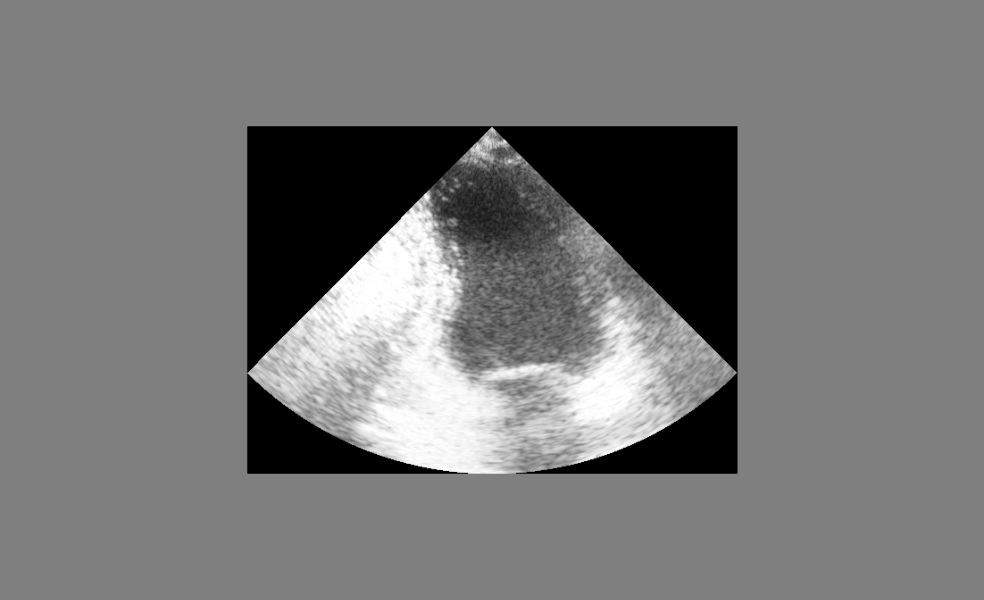
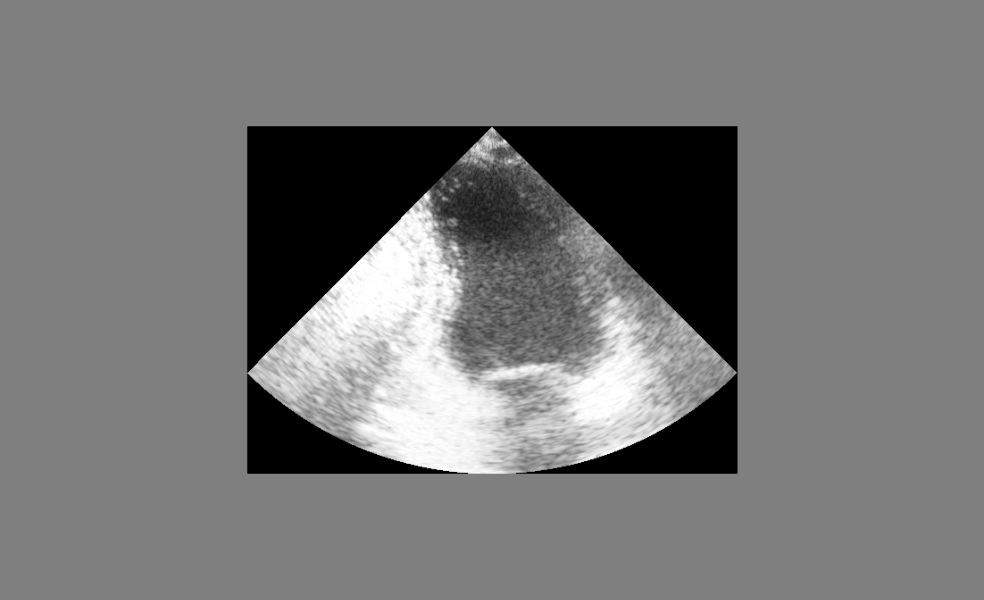

<IPython.core.display.Javascript object>

In [8]:
view(fixed_image)


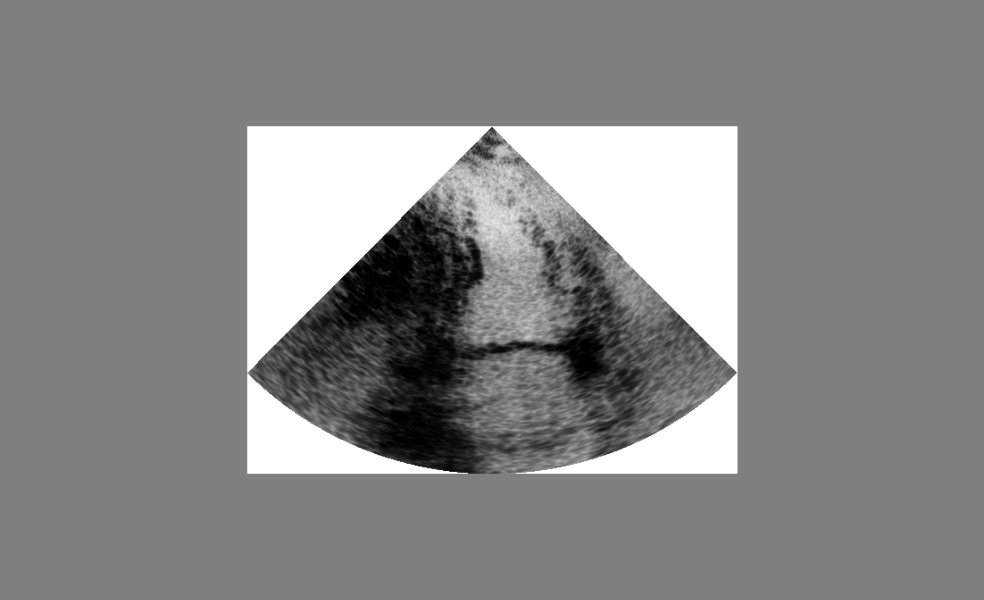
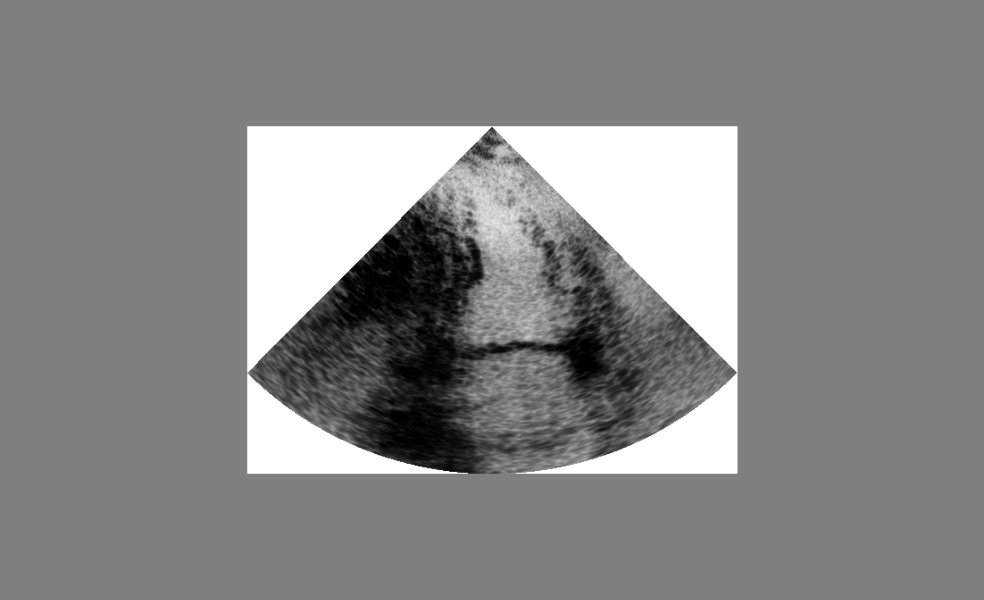

<IPython.core.display.Javascript object>

In [9]:
view(moving_image)


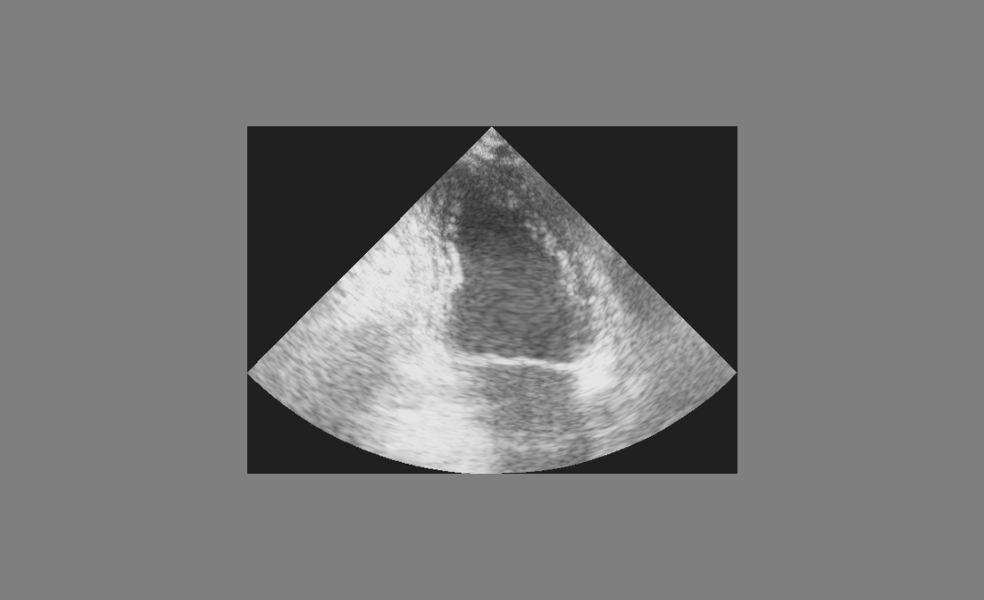
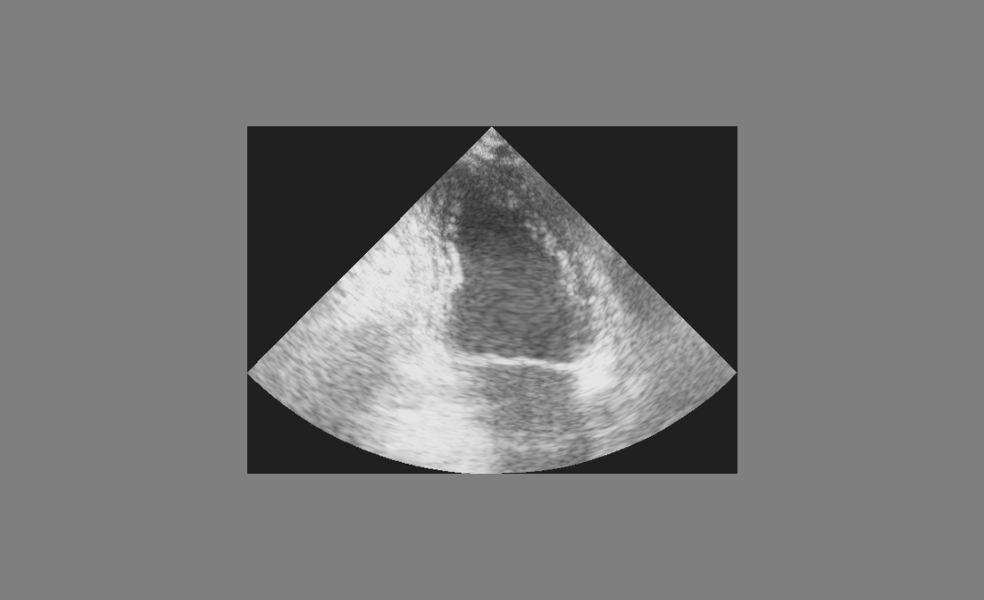

<IPython.core.display.Javascript object>

In [10]:
# display the result
view(registered_image)

#### Compute similarity metrics between the moving and registered images.

In [11]:
from skimage.metrics import structural_similarity

# Compute the MSE between the registered image and the moving image
mse = np.mean((registered_image_np - moving_image_np)**2)
print('MSE: ', mse)

# Compute the PSNR between the registered image and the moving image
psnr = 10 * np.log10(255**2 / mse)
print('PSNR: ', psnr)

# Compute the NRMSE between the registered image and the moving image
nrmse = np.sqrt(mse)/np.std(moving_image_np)
print('NRMSE: ', nrmse)

# Compute the normalized cross-correlation between the registered image and the moving image
ncc = np.mean((registered_image_np - np.mean(registered_image_np))*(moving_image_np - np.mean(moving_image_np)))/(np.std(registered_image_np)*np.std(moving_image_np))
print('NCC: ', ncc)

# Compute the SSIM between the registered image and the moving image
ssim = structural_similarity(registered_image_np, moving_image_np)
print('SSIM: ', ssim)

MSE:  687.0294
PSNR:  19.76105026702012
NRMSE:  0.27845562
NCC:  0.9611991
SSIM:  0.5135145128200753
